In [1]:
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')
sns.set(rc={'figure.figsize':(11.7,100.)})
import matplotlib.pyplot as plt
%matplotlib inline

Query dados de acordaos por relator

`
SELECT distinct(acordao), relator 
FROM acordaos 
where acordao IS NOT NULL 
AND acordao <> '' 
AND acordao <> 'SIGILOSO'
AND relator IS NOT NULL 
AND relator <> 'SIGILOSO' 
AND relator <> ''
`

Query dados de acordaos por tipo de processo

`
SELECT acordao, tipo_processo FROM acordaos 
WHERE ano_acordao >= 2013 
AND acordao IS NOT NULL 
AND acordao <> '' 
AND tipo_processo IS NOT NULL 
AND tipo_processo <> 'SIGILOSO' 
AND tipo_processo <> '' 
AND tipo_processo LIKE '%(%' 
AND tipo_processo = UPPER(tipo_processo)
`

# Análise Básica dos dados originais agrupados por relator

In [2]:
relator_data = pd.read_csv('../datasets/acordaos_relator.csv')
len(relator_data)

292740

In [3]:
relator_data.groupby('relator').count().sort_values('acordao',ascending=False)

,acordao
relator,
WALTON ALENCAR RODRIGUES,30816
MARCOS BEMQUERER,26973
BENJAMIN ZYMLER,21047
AUGUSTO NARDES,20095
ANA ARRAES,19468
AUGUSTO SHERMAN,17514
ANDRÉ DE CARVALHO,16778
JOSÉ JORGE,15683
RAIMUNDO CARREIRO,15501


In [4]:
relator_data.groupby('relator').count().reset_index().describe()

,acordao
count,32.00000
mean,9148.12500
std,8799.61359
min,41.00000
25%,1130.50000
50%,7019.00000
75%,15546.50000
max,30816.00000


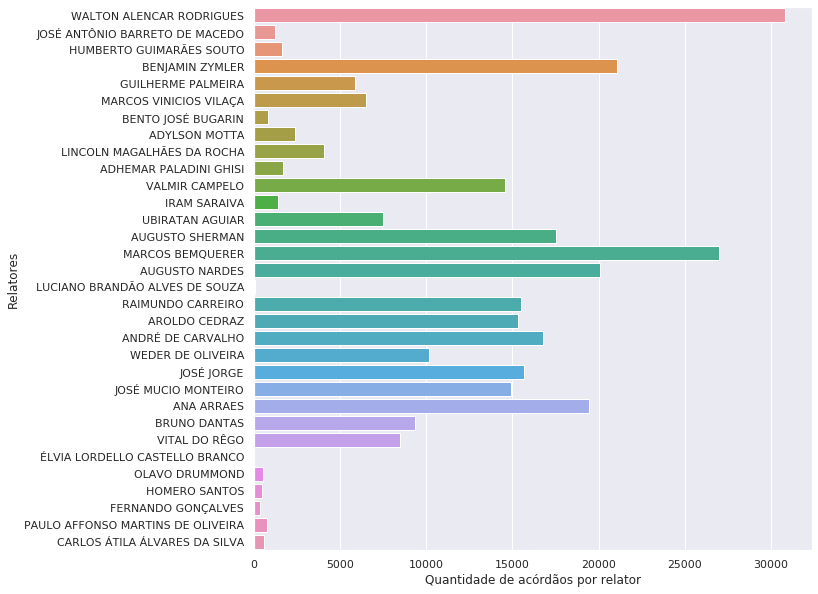

In [5]:
plt.figure(figsize=(10,10))
g = sns.countplot(y=relator_data.relator)
g.set(ylabel='Relatores',xlabel='Quantidade de acórdãos por relator')
plt.show()

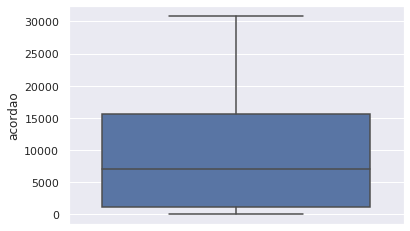

In [6]:
sns.boxplot(x=relator_data.groupby('relator').count().reset_index().acordao, orient='v')

# Análise Básica dos dados agrupados por relator com mais que 5k exemplos

In [7]:
relatores_5k = relator_data.groupby('relator').filter(lambda x: len(x) > 5000)
len(relatores_5k)

276638

In [8]:
relatores_5k.groupby('relator').count().sort_values('acordao',ascending=False)

,acordao
relator,
WALTON ALENCAR RODRIGUES,30816
MARCOS BEMQUERER,26973
BENJAMIN ZYMLER,21047
AUGUSTO NARDES,20095
ANA ARRAES,19468
AUGUSTO SHERMAN,17514
ANDRÉ DE CARVALHO,16778
JOSÉ JORGE,15683
RAIMUNDO CARREIRO,15501


In [9]:
dados_agrupados = relatores_5k.groupby('relator').count().reset_index()
dados_agrupados.describe()

,acordao
count,18.000000
mean,15368.777778
std,6829.770606
min,5877.000000
25%,9566.250000
50%,15422.000000
75%,18979.500000
max,30816.000000


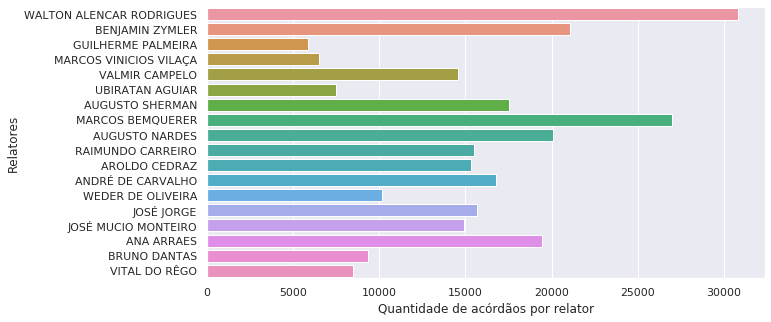

In [10]:
plt.figure(figsize=(10,5))
g = sns.countplot(y=relatores_5k.relator)
g.set(ylabel='Relatores',xlabel='Quantidade de acórdãos por relator')
plt.show()

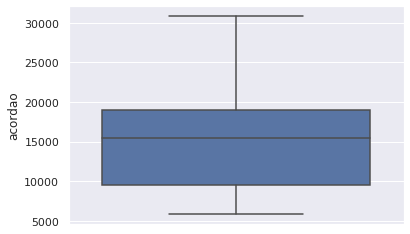

In [11]:
sns.boxplot(x=dados_agrupados.acordao, orient='v')

# Amostragem de 10% dos dados onde cada relator tem mais que 5k acórdãos

In [12]:
relatores_sampled = relatores_5k.groupby('relator')\
                                    .apply(pd.DataFrame.sample, frac=0.1)\
                                    .reset_index(drop=True)
len(relatores_sampled)

27665

In [13]:
relatores_sampled.groupby('relator').count().sort_values('acordao',ascending=False)

,acordao
relator,
WALTON ALENCAR RODRIGUES,3082
MARCOS BEMQUERER,2697
BENJAMIN ZYMLER,2105
AUGUSTO NARDES,2010
ANA ARRAES,1947
AUGUSTO SHERMAN,1751
ANDRÉ DE CARVALHO,1678
JOSÉ JORGE,1568
RAIMUNDO CARREIRO,1550


In [14]:
dados_agrupados = relatores_sampled.groupby('relator').count().reset_index()
dados_agrupados.describe()

,acordao
count,18.000000
mean,1536.944444
std,682.988198
min,588.000000
25%,956.500000
50%,1542.000000
75%,1898.000000
max,3082.000000


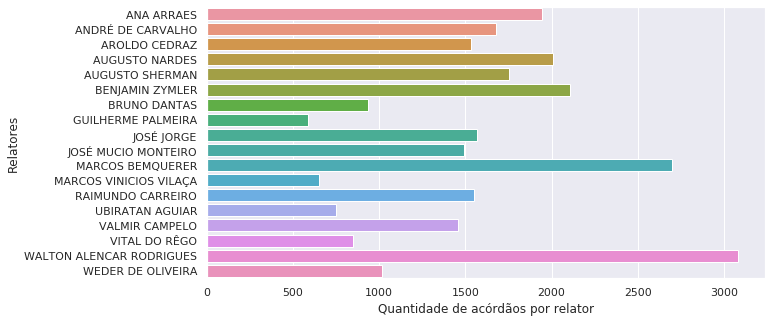

In [15]:
plt.figure(figsize=(10,5))
g = sns.countplot(y=relatores_sampled.relator)
g.set(ylabel='Relatores',xlabel='Quantidade de acórdãos por relator')
plt.show()

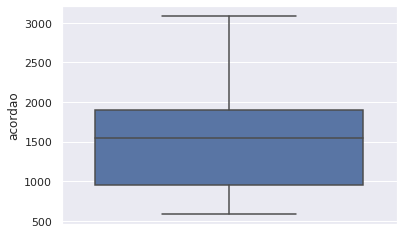

In [16]:
sns.boxplot(x=dados_agrupados.acordao, orient='v')